In [5]:
import pandas as pd
import numpy as np
import pickle
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [6]:
data=pd.read_csv('/content/drive/MyDrive/heart_disease/heart_disease.csv')

In [7]:
data.head()

,Unnamed: 0,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease,BMI_Underweight,BMI_Normal,BMI_Overweight
0,0,16.60,1,0,0,3.0,30.0,0,0,57,1,2,1,2,5.0,1,0,1,0,1,0,0
1,1,20.34,0,0,1,0.0,0.0,0,0,82,1,1,1,2,7.0,0,0,0,0,0,1,0
2,2,26.58,1,0,0,20.0,30.0,0,1,67,1,2,1,4,8.0,1,0,0,0,0,1,0
3,3,24.21,0,0,0,0.0,0.0,0,0,77,1,1,0,3,6.0,0,0,1,0,0,1,0
4,4,23.71,0,0,0,28.0,0.0,1,0,42,1,1,1,2,8.0,0,0,0,0,0,1,0


In [8]:
def model_eval(model, X_test, y_test):
    assert len(X_test) == len(y_test), "X_test and y_test are not equal in size."
    
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[::, 1]
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_pred, y_test))
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'AUC: {round(auc, 3)}')
    plt.legend()
    plt.show()

In [9]:
X=data.drop('HeartDisease',axis=1)
y=data['HeartDisease']

train test split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

Logistic Regression

In [11]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

[[44098 14316]
 [ 5881 51707]]
              precision    recall  f1-score   support

           0       0.75      0.88      0.81     49979
           1       0.90      0.78      0.84     66023

    accuracy                           0.83    116002
   macro avg       0.83      0.83      0.83    116002
weighted avg       0.84      0.83      0.83    116002



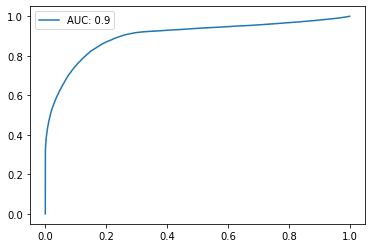

In [12]:
model_eval(log_model, X_test, y_test)

Using balanced weights

In [13]:
log_model_bal = LogisticRegression(max_iter=500, class_weight="balanced")
log_model_bal.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=500)

[[44132 14282]
 [ 5909 51679]]
              precision    recall  f1-score   support

           0       0.76      0.88      0.81     50041
           1       0.90      0.78      0.84     65961

    accuracy                           0.83    116002
   macro avg       0.83      0.83      0.83    116002
weighted avg       0.84      0.83      0.83    116002



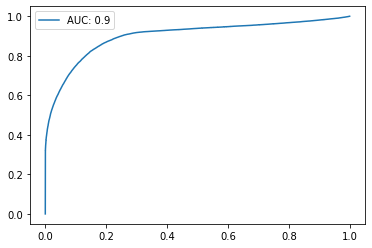

In [14]:
model_eval(log_model_bal, X_test, y_test)

In [20]:
SAVE_PATH='/content/drive/MyDrive/heart_disease/logistic.pkl'
with open(SAVE_PATH, "wb") as pickle_out:
    pickle.dump(log_model_bal, pickle_out)

Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

In [16]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

[[57945   469]
 [ 4875 52713]]
              precision    recall  f1-score   support

           0       0.99      0.92      0.96     62820
           1       0.92      0.99      0.95     53182

    accuracy                           0.95    116002
   macro avg       0.95      0.96      0.95    116002
weighted avg       0.96      0.95      0.95    116002



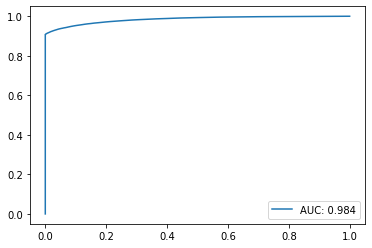

None


In [17]:
print(model_eval(rf_model, X_test, y_test))

In [18]:
rf_model_bal = RandomForestClassifier(n_estimators=500, class_weight="balanced")
rf_model_bal.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=500)

[[57967   447]
 [ 4891 52697]]
              precision    recall  f1-score   support

           0       0.99      0.92      0.96     62858
           1       0.92      0.99      0.95     53144

    accuracy                           0.95    116002
   macro avg       0.95      0.96      0.95    116002
weighted avg       0.96      0.95      0.95    116002



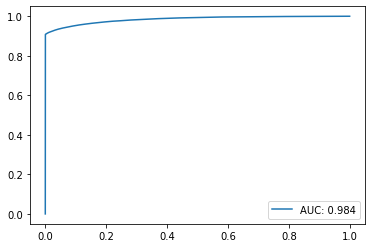

None


In [21]:
print(model_eval(rf_model_bal, X_test, y_test))

In [22]:
SAVE_PATH='/content/drive/MyDrive/heart_disease/random_forest.pkl'
with open(SAVE_PATH, "wb") as pickle_out:
    pickle.dump(rf_model_bal, pickle_out)